In [1]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

### Definición de la red

In [2]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 5, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(5, 3, activation=activation_functions.softmax,
                            activation_derivate=None))

### Dataset de Iris

In [3]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

In [5]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc5, loss5) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=100, learning_rate=0.01)

accuracy before training:  0.4
epoch   0 - Loss 0.34745, Accuracy 0.16667
epoch  10 - Loss 1.00354, Accuracy 0.16667
epoch  20 - Loss 0.76163, Accuracy 0.45833
epoch  30 - Loss 0.71647, Accuracy 0.45833
epoch  40 - Loss 0.67648, Accuracy 0.45833
epoch  50 - Loss 0.63029, Accuracy 0.62500
epoch  60 - Loss 0.57632, Accuracy 0.75000
epoch  70 - Loss 0.51485, Accuracy 0.83333
epoch  80 - Loss 0.44080, Accuracy 0.91667
epoch  90 - Loss 0.36272, Accuracy 0.91667


In [6]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  1.0


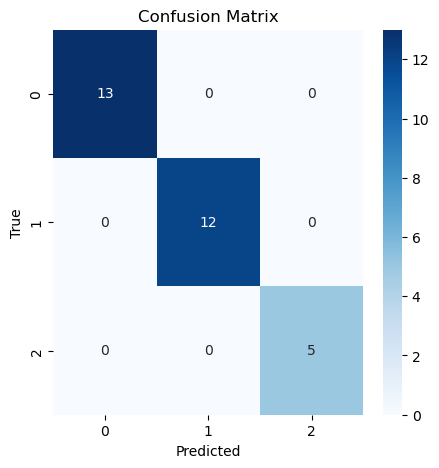

In [7]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

In [8]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 7, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(7, 10, activation=activation_functions.softmax, 
                                activation_derivate=None))

### Dataset de MNIST

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = enc.fit_transform(y_test.reshape(-1,1)).toarray()

print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))

accuracy before training:  0.1215


### Entrenamiento de la red

In [11]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
acc7 = optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=80, learning_rate=0.001)

accuracy before training:  0.1215
epoch   0 - Loss 0.50507, Accuracy 0.76675


In [ ]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.8832


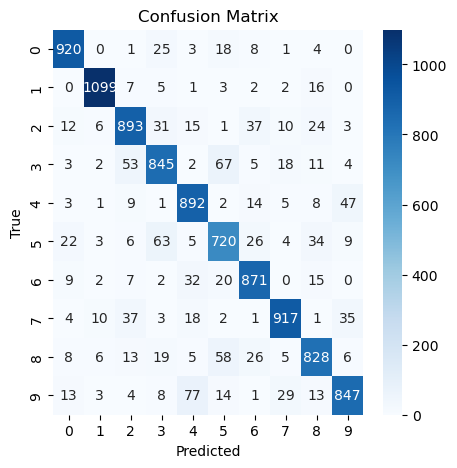

In [ ]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()